## Insialisasi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Setting visualisasi
plt.style.use('default')
sns.set_palette("husl")

## Eksplorasi

In [3]:
df = pd.read_csv('/content/climate_data.csv')

print(f"Jumlah baris: {len(df)}")
print(f"Jumlah kolom: {len(df.columns)}")

Jumlah baris: 589265
Jumlah kolom: 12


In [4]:
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        589265 non-null  object 
 1   Tn          565882 non-null  float64
 2   Tx          551529 non-null  float64
 3   Tavg        544160 non-null  float64
 4   RH_avg      541083 non-null  float64
 5   RR          463881 non-null  float64
 6   ss          545544 non-null  float64
 7   ff_x        579051 non-null  float64
 8   ddd_x       576137 non-null  float64
 9   ff_avg      579138 non-null  float64
 10  ddd_car     575526 non-null  object 
 11  station_id  589265 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 53.9+ MB


In [6]:
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id
count,565882.000000,551529.000000,544160.000000,541083.000000,463881.000000,545544.000000,579051.000000,576137.000000,579138.000000,589265.000000
mean,23.312111,31.528955,26.855475,82.489365,8.680760,5.083199,4.709601,188.488325,1.956680,96832.949230
std,2.280687,2.311659,1.939656,14.337669,17.928752,3.261586,2.612285,107.657452,1.803358,542.419161
min,0.000000,0.000000,0.000000,24.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,96001.000000
25%,23.000000,30.500000,26.200000,79.000000,0.000000,2.500000,3.000000,90.000000,1.000000,96293.000000
50%,24.000000,31.800000,27.200000,83.000000,1.000000,5.300000,4.000000,180.000000,2.000000,96797.000000
75%,25.000000,33.000000,28.000000,87.000000,9.300000,7.600000,6.000000,270.000000,3.000000,97240.000000
max,246.000000,334.000000,141.600000,7520.000000,1965.500000,705.000000,185.000000,931.000000,160.000000,97980.000000


In [7]:
print("Missing values per kolom:")
print(df.isnull().sum())

Missing values per kolom:
date               0
Tn             23383
Tx             37736
Tavg           45105
RH_avg         48182
RR            125384
ss             43721
ff_x           10214
ddd_x          13128
ff_avg         10127
ddd_car        13739
station_id         0
dtype: int64


## Data Cleaning

In [8]:
# Cek duplikat data
print(f"Jumlah duplikat: {df.duplicated().sum()}")

# Hapus duplikat jika ada
df = df.drop_duplicates()
print(f"Jumlah baris setelah hapus duplikat: {len(df)}")

Jumlah duplikat: 0
Jumlah baris setelah hapus duplikat: 589265


In [9]:
# Handle missing values - hapus baris dengan missing values
df_clean = df.dropna()
print(f"Jumlah baris setelah hapus missing values: {len(df_clean)}")

Jumlah baris setelah hapus missing values: 372151


In [12]:
# Menggunakan NumPy untuk operasi pada kolom numerik
tn_array = np.array(df_clean['Tn'])

print("Perhitungan untuk mengecek suhu udara di Indonesia menggunakan NumPy:")
print(f"Mean: {np.mean(tn_array)}")
print(f"Median: {np.median(tn_array)}")
print(f"Std: {np.std(tn_array)}")

# Kesimpulannya pada tahun 2010 suhu indonesia rata-rata ada di 23.3 derajat.
# Tapi, karena mean < median maka dapat disimpulkan bahwa terdapat daerah yang kurang dari 23.
# Kemungkinan terbesar adalah daerah tersebut mempunyai suhu 20 ke bawah.

Perhitungan untuk mengecek suhu udara di Indonesia menggunakan NumPy:
Mean: 23.383623045484235
Median: 24.0
Std: 2.15557597440973


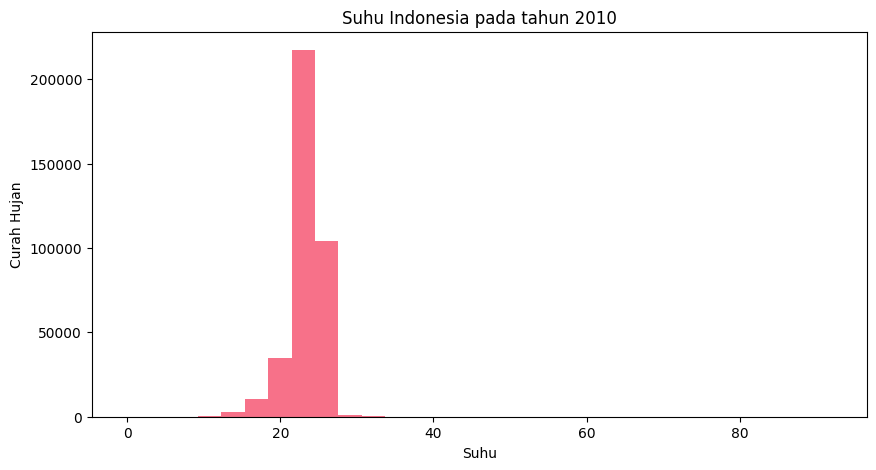

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(df_clean['Tn'], bins=30)
plt.xlabel('Suhu')
plt.ylabel('Curah Hujan')
plt.title('Suhu Indonesia pada tahun 2010')
plt.show()

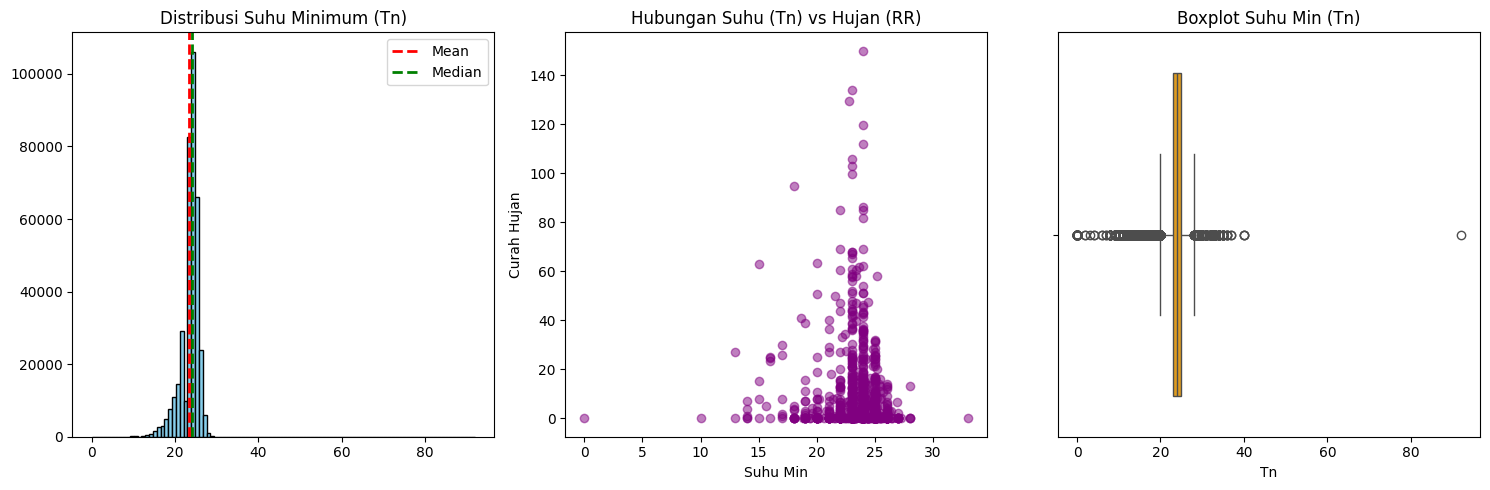

In [23]:
plt.figure(figsize=(15, 5))

# Chart 1 - Bukti dugaan sebelumnya
plt.subplot(1, 3, 1) # Gambar ke-1
plt.hist(df_clean['Tn'], bins=100, color='skyblue', edgecolor='black')
plt.axvline(np.mean(df_clean['Tn']), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(df_clean['Tn']), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distribusi Suhu Minimum (Tn)')
plt.legend()

# Chart 2 - Apakah curah hujan memengaruhi suhu?
plt.subplot(1, 3, 2)
# Kita ambil sample 1000 data aja biar gak berat ngerendernya
sample = df_clean.sample(1000)
plt.scatter(sample['Tn'], sample['RR'], alpha=0.5, color='purple')
plt.title('Hubungan Suhu (Tn) vs Hujan (RR)')
plt.xlabel('Suhu Min')
plt.ylabel('Curah Hujan')

# Chart 3 - Pendeteksi Anomali data.
plt.subplot(1, 3, 3) # Gambar ke-3
sns.boxplot(x=df_clean['Tn'], color='orange')
plt.title('Boxplot Suhu Min (Tn)')

plt.tight_layout()
plt.show()

Dari Grafik itu bisa disimpulkan:
1. Grafik pertama itu sesuai dugaan, yaitu akan condong ke kiri karena mean < median yang bisa disimpulkan juga bahwa ada beberapa suhu yang dibawah 20.
2. Grafik kedua menjelaskan bahwa kondisi curah hujan tidak terlalu mempengaruhi karena meskipun curah hujan rendah suhu tetap di perhitungan rata2
3. Grafik ketiga menjelaskan bahwa ada banyak anomali dalam data karena tidak mungkin suhu menyentuh 45-100 derajat bahkan dengan suhu 40 derajat saja manusia sudah tidak bisa.



In [24]:
df_clean = df_clean[(df_clean['Tn'] < 40) & (df_clean['Tn'] > 0)]

In [25]:
df.value_counts()

date        Tn    Tx    Tavg  RH_avg  RR    ss   ff_x  ddd_x  ff_avg  ddd_car  station_id
31-12-2020  26.1  32.2  28.8  82.0    0.0   3.0  7.0   220.0  2.0     C        97698         1
01-01-2010  15.0  26.2  21.7  83.0    0.0   5.6  4.0   90.0   1.0     NE       97284         1
            17.0  31.2  26.8  92.0    0.0   0.2  4.0   360.0  4.0     N        96075         1
            18.0  24.0  21.8  95.0    62.0  0.0  3.0   90.0   0.0     N        96945         1
                  27.0  22.4  84.0    12.0  0.8  4.0   360.0  2.0     N        96975         1
                                                                                            ..
            21.0  29.2  24.1  86.0    6.0   4.2  3.0   180.0  1.0     S        96943         1
            20.0  31.1  26.0  86.0    13.0  4.5  0.0   0.0    0.0     N        96073         1
                  31.0  25.8  89.0    0.0   5.5  4.0   225.0  0.0     SW       96179         1
                  28.6  23.0  88.0    2.0   3.3  3.0   135.0  2.0     N        97124         1
            19.6  26.8  22.6  95.0    28.0  2.4  4.0   360.0  1.0     SW       96257         1
Name: count, Length: 372151, dtype: int64

In [26]:
print({len(df_clean)})

{372087}


In [27]:
# Pengecekkan kategori suhu
df_clean['Kategori_Suhu'] = pd.cut(
    df_clean['Tn'],
    bins=[-1, 20, 26, 100],  # Batas yg diatur adalah 0-20, 20-26, 26-100
    labels=['Dingin', 'Normal', 'Panas']
)
print(df_clean['Kategori_Suhu'].value_counts())

Kategori_Suhu
Normal    330487
Dingin     31876
Panas       9724
Name: count, dtype: int64


Bisa dilihat bahwa suhu normal 80% dari total hari, menandakan bahwa selama 2010 suhu indonesia terbilang normal.

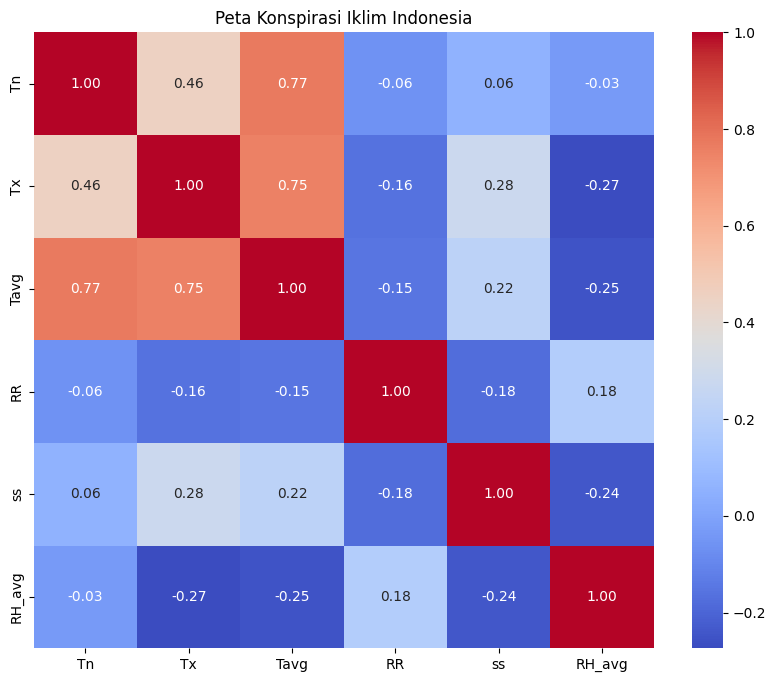

Perubahan Kategori ke Angka:
   Kategori_Suhu  Kategori_Angka
0         Normal               1
1         Normal               1
2         Normal               1
3         Normal               1
7         Normal               1
8         Normal               1
9         Dingin               0
10        Dingin               0
11        Normal               1
12        Normal               1

Statistik setelah Scaling (Perhatikan Mean & Std):
Mean Tn_Scaled: -0.0000
Std Tn_Scaled: 1.0000


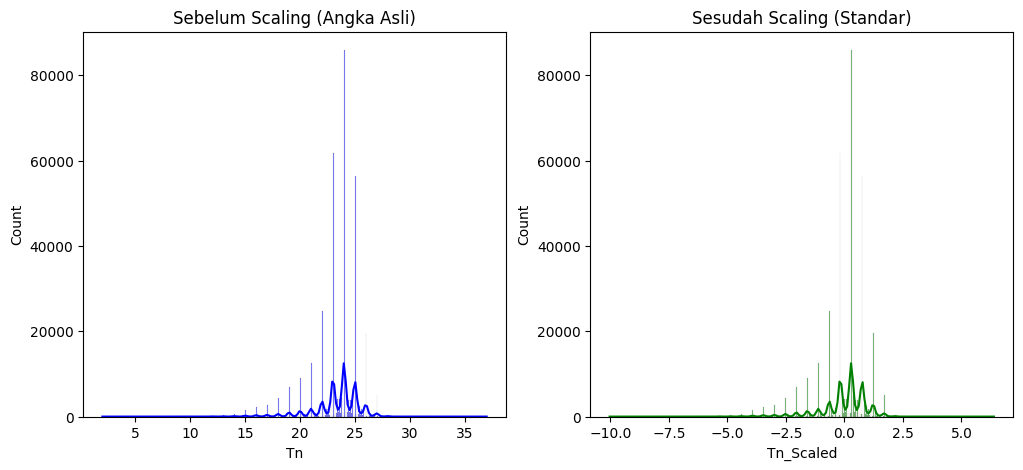

In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

# 1 - Mencari hubungan (wwhen yah)
plt.figure(figsize=(10, 8))
cols = ['Tn', 'Tx', 'Tavg', 'RR', 'ss', 'RH_avg']
corr_matrix = df_clean[cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Peta Konspirasi Iklim Indonesia')
plt.show()

# 2 - Mengubah kategori ke angka
# Alasan ngelakuin ini karena mesin gabisa baca Dingin/Panas, jadi kita ubah aja jadi 0, 1, 2.
le = LabelEncoder()
df_clean['Kategori_Angka'] = le.fit_transform(df_clean['Kategori_Suhu'])

print("Perubahan Kategori ke Angka:")
print(df_clean[['Kategori_Suhu', 'Kategori_Angka']].head(10))

# 3 Membuat setara level
# Lalu, disini Kita scaling kolom Tn dan RR biar adil.
scaler = StandardScaler()
df_clean[['Tn_Scaled', 'RR_Scaled']] = scaler.fit_transform(df_clean[['Tn', 'RR']])

# Cek hasil scaling, disini harusnya mean mendekati 0 dan std mendekati 1
print("\nStatistik setelah Scaling (Perhatikan Mean & Std):")
print(f"Mean Tn_Scaled: {df_clean['Tn_Scaled'].mean():.4f}")
print(f"Std Tn_Scaled: {df_clean['Tn_Scaled'].std():.4f}")

# Visualisasi Hasil Scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_clean['Tn'], ax=axes[0], color='blue', kde=True).set_title('Sebelum Scaling (Angka Asli)')
sns.histplot(df_clean['Tn_Scaled'], ax=axes[1], color='green', kde=True).set_title('Sesudah Scaling (Standar)')
plt.show()

Disini kita membuat grafik untuk melihat korelasi dan hasil statistik setelah scaling. Tujuan scaling biar mesin bisa baca angkanya.